In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib
%matplotlib inline 

In [3]:
img = cv2.imread('pic1.png')

In [4]:
im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

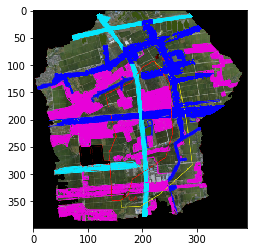

In [5]:
plt.imshow(im_rgb)

In [6]:
#设置阈值
l_black = np.array([0,0,0])
h_black = np.array([1,1,1])

In [7]:
#构建掩模
black = cv2.inRange(im_rgb, l_black, h_black)

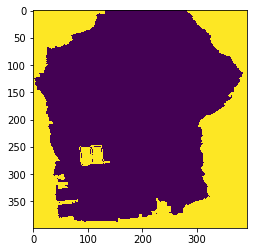

In [8]:
plt.imshow(black)

In [9]:
#设置阈值
l_blue = np.array([[0,0,200]])
h_blue = np.array([10,10,255])

In [10]:
#构建掩模
blue = cv2.inRange(im_rgb, l_blue, h_blue)

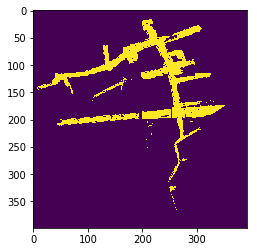

In [11]:
plt.imshow(blue)

In [12]:
#设置阈值
l_pink = np.array([[230,1,216]])
h_pink = np.array([232,3,218])
#构建掩模
pink = cv2.inRange(im_rgb, l_pink, h_pink)

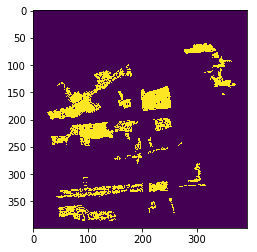

In [13]:
plt.imshow(pink)

In [14]:
#设置阈值
l_cyan = np.array([[4,229,252]])
h_cyan = np.array([6,231,254])
#构建掩模
cyan = cv2.inRange(im_rgb, l_cyan, h_cyan)

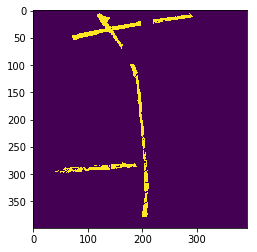

In [15]:
plt.imshow(cyan)

In [16]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(7, 7))

In [17]:
blue_close = cv2.morphologyEx(blue, cv2.MORPH_CLOSE, kernel)
pink_close = cv2.morphologyEx(pink, cv2.MORPH_CLOSE, kernel)
cyan_close = cv2.morphologyEx(cyan, cv2.MORPH_CLOSE, kernel)
black_close = cv2.morphologyEx(black, cv2.MORPH_CLOSE, kernel)

In [18]:
class_2 = blue_close
class_3 = cyan_close+pink_close
class_4 = black_close

In [19]:
row, col, _ = im_rgb.shape

In [20]:
merged_img = np.zeros([row, col])

In [21]:
for i in range(row):
    for j in range(col):
        b_2 = bool(class_2[i,j])
        b_3 = bool(class_3[i,j])
        b_4 = bool(class_4[i,j])
        bool_list = [b_2,b_3,b_4]
        
        choice_list = np.array([2,3,4])
        choice_list = choice_list[bool_list]
        if not choice_list.size:
            merged_img[i,j] = 1
        else:
            merged_img[i,j] = random.choice(choice_list)

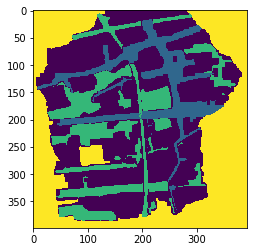

In [22]:
plt.imshow(merged_img)

In [23]:
merged_img.shape

(399, 392)

In [24]:
pic = cv2.resize(merged_img, (4000, 4000), interpolation=cv2.INTER_NEAREST)

In [25]:
pic[2500,1000]

1.0

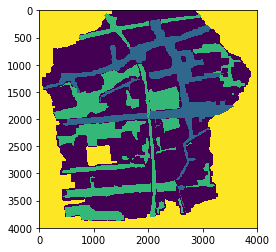

In [26]:
plt.imshow(pic)

In [27]:
np.save("map",pic)

In [28]:
plt.show()

# A* Algorithm

In [29]:
from pathfinder import pathfinder

In [30]:
start = (1400,3500)
end = (2200,900)
maze = cv2.resize(class_3, (4000, 4000), interpolation=cv2.INTER_NEAREST)

In [31]:
maze[end[0],end[1]]

255

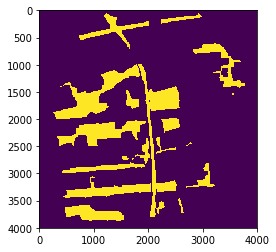

In [32]:
plt.imshow(maze)

In [33]:
path = list(pathfinder(maze).astar(start, end))

In [34]:
len(list(path))

3893

In [36]:
maze_viz = cv2.cvtColor(maze,cv2.COLOR_GRAY2RGB)

In [37]:
maze_viz.shape

(4000, 4000, 3)

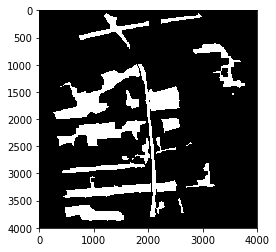

In [38]:
plt.imshow(maze_viz)

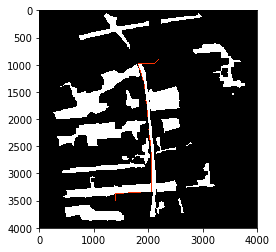

In [42]:
p1 = path[0]
for index,p in enumerate(path):
    if index == 0:
        continue
    p2 = p
    cv2.line(maze_viz, p1, p2, (255,50,0), 10)
    p1 = p
plt.imshow(maze_viz)